In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
airbnb_data = pd.read_csv('airbnb.csv', low_memory=False)

In [3]:
airbnb_data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,145,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,175,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,295,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,110,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,600,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv


In [4]:
# Define the function to extract year and month from the filename
def extract_year_month(filename):
    year, month = filename.split('_')[2:4]  # Extract year and month directly
    year_month = f"{year}-{month}"  # Create a year-month string in the format "YYYY-MM"
    return year, month, year_month

# Apply the function and create new columns for 'year', 'month', and 'year_month'
airbnb_data[['year', 'month', 'year_month']] = airbnb_data['Scrape File'].apply(
    lambda filename: pd.Series(extract_year_month(filename))
)

In [5]:
airbnb_data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File,year,month,year_month
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,...,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv,2015,05,2015-05
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,...,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv,2015,05,2015-05
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,...,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv,2015,05,2015-05
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,...,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv,2015,05,2015-05
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,...,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv,2015,05,2015-05


In [6]:
airbnb_data_cleaned = airbnb_data.dropna(subset=['minimum_nights'])

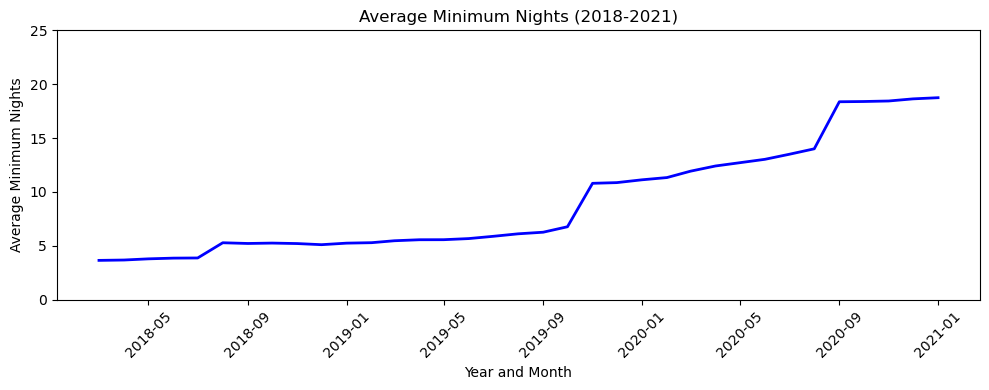

In [7]:
# Ensure "year_month" is in datetime format
airbnb_data_cleaned['year_month'] = pd.to_datetime(airbnb_data_cleaned['year_month'], format='%Y-%m')

# Filter data between January 2018 and December 2021
airbnb_data_filtered = airbnb_data_cleaned[(airbnb_data_cleaned['year_month'] >= '2018-01') & (airbnb_data_cleaned['year_month'] <= '2021-12')]

# Aggregate data by "year_month", calculating the mean of "minimum_nights"
# You can adjust this aggregation method as needed
aggregated_airbnb_data = airbnb_data_filtered.groupby('year_month')['minimum_nights'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(aggregated_airbnb_data['year_month'], aggregated_airbnb_data['minimum_nights'], marker='', color='blue', linewidth=2)
plt.title('Average Minimum Nights (2018-2021)')
plt.xlabel('Year and Month')
plt.ylabel('Average Minimum Nights')
plt.xticks(rotation=45)
plt.ylim(0,25)
plt.tight_layout()
plt.show()

In [27]:
description = airbnb_data['calculated_host_listings_count'].describe()
description

count    1.633610e+06
mean     6.309192e+00
std      1.741204e+01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      3.080000e+02
Name: calculated_host_listings_count, dtype: float64

In [32]:
# Function to categorize based on calculated_host_listings_count
def categorize(count):
    if count == 1:
        return 'small'
    elif count in [2, 3]:
        return 'medium'
    else:
        return 'large'

# Apply function to create a new column with categories
airbnb_data['host_type'] = airbnb_data['calculated_host_listings_count'].apply(categorize)

In [33]:
airbnb_data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File,year,month,year_month,owner_type,host_type
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,...,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv,2015,05,2015-05-01,large,large
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,...,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv,2015,05,2015-05-01,small,small
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,...,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv,2015,05,2015-05-01,medium,medium
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,...,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv,2015,05,2015-05-01,small,small
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,...,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv,2015,05,2015-05-01,large,large


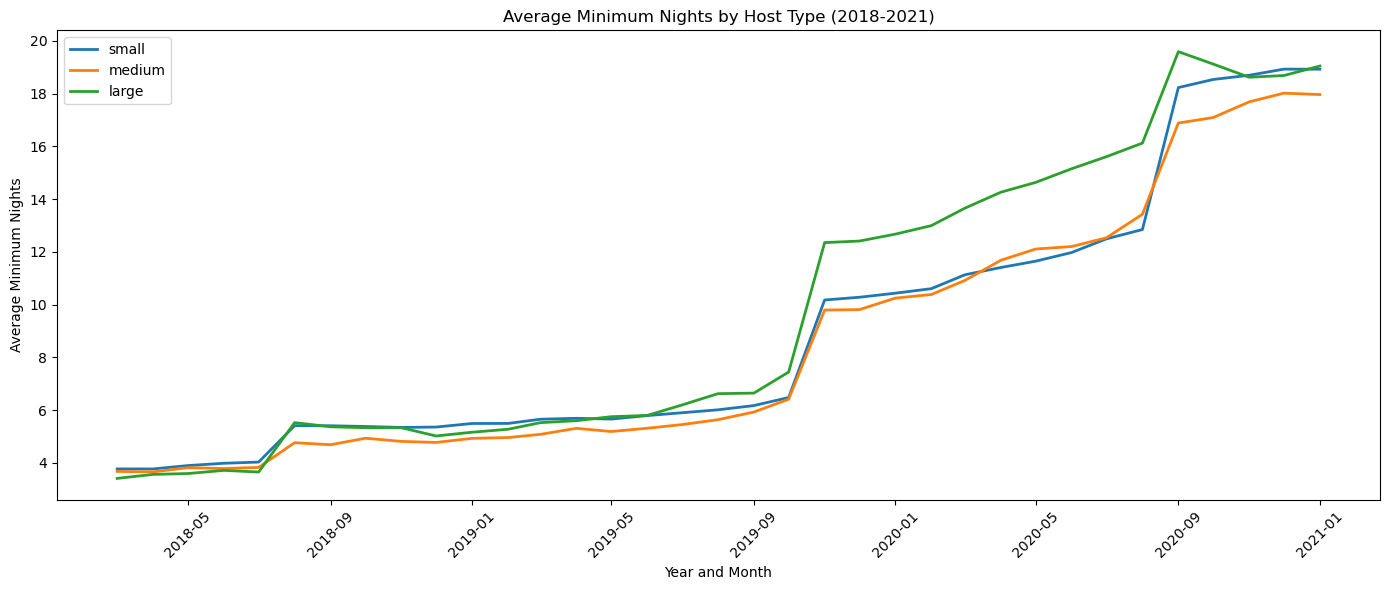

In [34]:
# Ensure "year_month" is in datetime format
airbnb_data['year_month'] = pd.to_datetime(airbnb_data['year_month'], format='%Y-%m')

# Filter data between January 2018 and December 2021
airbnb_data_filtered = airbnb_data[(airbnb_data['year_month'] >= '2018-01') & (airbnb_data['year_month'] <= '2021-12')]

# Aggregate data by "year_month" and "room_type", calculating the mean of "minimum_nights"
aggregated_airbnb_data = airbnb_data_filtered.groupby(['year_month', 'host_type'])['minimum_nights'].mean().unstack()

host_types = ['small', 'medium', 'large']
# Plotting
plt.figure(figsize=(14, 6))
for host_type in host_types:
    plt.plot(aggregated_airbnb_data.index, aggregated_airbnb_data[host_type], marker='', linewidth=2, label=host_type)
plt.title('Average Minimum Nights by Host Type (2018-2021)')
plt.xlabel('Year and Month')
plt.ylabel('Average Minimum Nights')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()